In [30]:
import re
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
% matplotlib inline

## Create a simple network

In [31]:
G=nx.Graph()
G.add_node("D")
G.add_edge("A","B")
G.add_edge("A","C")
print(G.nodes())
print(G.edges())
G.remove_node("D")
print("...removed D")
print(G.nodes())
print(G.edges())

['D', 'A', 'B', 'C']
[('A', 'B'), ('A', 'C')]
...removed D
['A', 'B', 'C']
[('A', 'B'), ('A', 'C')]


## Attributes and iterators

In [32]:
## adding attributes associated with a node
g=nx.Graph()
g.add_node(1,time='12AM') 
print(g.node[1]['time'])
print(g.node[1])

## adding attributes associated with an edge
g.add_edge(1, 2, weight=4.0 ) 
g[1][2]['weight'] = 5.0 
# edge already added 
g[1][2]

12AM
{'time': '12AM'}


{'weight': 5.0}

In [33]:
# iterate throuh an unweighted graph
g=nx.Graph()
g.add_edge(1,2)
for node in g.nodes():
    print(node, g.degree(node))

print("-----------")
    
# iterate throuh a weighted graph    
g=nx.Graph()
g.add_edge(1,2,weight=1.0)
g.add_edge(1,3,weight=2.5)
g[1][2]['weight'] = 1.5
for n1,n2,attr in g.edges(data=True):
    print(n1,n2,attr['weight'])

1 1
2 1
-----------
1 2 1.5
1 3 2.5


## Here is a function to draw a network

In [49]:
def draw_network(edge_dict,file_name=None,ax=None,node_size=300):
    """draw a simple network"""
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_yticks([])
        ax.set_xticks([])

    G = nx.Graph()
    for edge,weight in edge_dict.items():
        G.add_edge(edge[0],edge[1],weight=weight)

    pos=nx.spring_layout(G)

    ## draw the nodes                                                                                                          
    nx.draw_networkx(G,pos,node_size=node_size,
                     node_color='#ADD8E6',alpha=0.9,ax=ax)

    ax.axis('off')
    
    if file_name:
        plt.savefig(file_name)

## Create a container for some node and edge information

Lets imagine that dictionaries are a reasonable way to carry around the information contained in a network.  Try creating an edge dictionary that works with the above function.

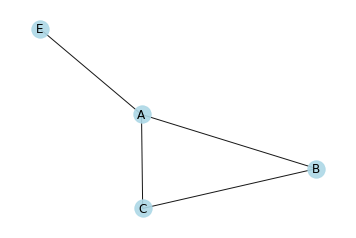

In [50]:
import numpy as np
np.random.seed(42)
edge_dict = {("A","B"):1,("B","C"):1,("A","C"):1,("A","E"):1}
draw_network(edge_dict,"simple.png")
#Image(filename='simple.png')

## Types of graphs

You may have heard of a random graph or a scale free graph. Well there are many types classificaitons of graph out there.

In [51]:
# small famous graphs
petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

# classic graphs
K_5=nx.complete_graph(5)
K_3_5=nx.complete_bipartite_graph(3,5)
barbell=nx.barbell_graph(10,10)
lollipop=nx.lollipop_graph(10,20)

# random graphs
er=nx.erdos_renyi_graph(100,0.15)
ws=nx.watts_strogatz_graph(30,3,0.1)
ba=nx.barabasi_albert_graph(100,5)
red=nx.random_lobster(100,0.9,0.9)

NetworkX can create  many of them. Here is how you create a path graph.  **Can you create a figure with two panels comparing two of these graphs?** 

https://networkx.github.io/documentation/development/reference/generators.html

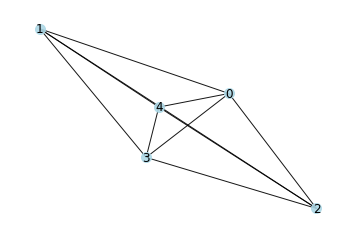

In [52]:
#G=nx.path_graph(10)
G = nx.complete_graph(5)
edge_dict = dict([(e, 1) for e in G.edges()])
draw_network(edge_dict,"path.png",node_size=100)
#Image(filename='path.png')

In [37]:
#your code for the two subplots goes here

## Shortest paths

Use Dijkstra’s algorithm to find the shortest path in a weighted and 
unweighted network

[('a', 'c'), ('c', 'e')]


(-0.10500000000000001, 1.105, -0.10234069034317908, 1.0770139317067893)

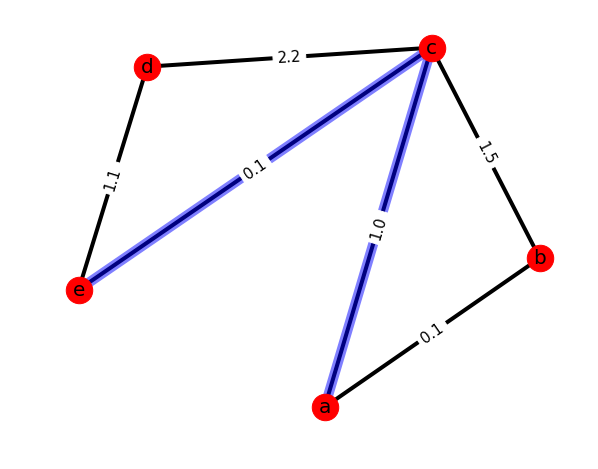

In [46]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

G=nx.Graph()

G.add_edge('a','b',weight=0.1) 
G.add_edge('b','c',weight=1.5) 
G.add_edge('a','c',weight=1.0) 
G.add_edge('c','d',weight=2.2)
G.add_edge('d','e',weight=1.1)
G.add_edge('e','c',weight=0.1)

#print(nx.shortest_path(G,'b','d')) # use if we are non-weighted
dpath = nx.dijkstra_path(G,'a','e')
dpath = [(dpath[i],dpath[i+1]) for i in range(len(dpath)) if i+1 < len(dpath)] 

edges_path=[(u,v) for (u,v,d) in G.edges(data=True) if (u,v) in dpath or (v,u) in dpath]
edges_all=[(u,v) for (u,v,d) in G.edges(data=True)]

print(edges_path)
pos=nx.spring_layout(G,k=20,weight='weight') # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=edges_all,
                    width=4)
nx.draw_networkx_edges(G,pos,edgelist=edges_path,
                    width=10,alpha=0.5,edge_color='b') #style='dashed'

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
edge_weight=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, font_size=15,edge_labels=edge_weight)

ax.axis('off')
#plt.savefig("shortest-path.png") # save as png
#Image(filename='shortest-path.png')

## Trees

A tree is a connected acyclic graph.  Think about that for a second.  Then think about what a [minimial spanning tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree) might be?  Here is an example of a minimal spanning tree borrowed from http://avinashu.com/tutorial/pythontutorial/NetworkXBasics.html:

[(3, 6), (3, 2), (8, 9), (8, 7), (8, 5), (1, 2), (2, 5), (5, 4)]


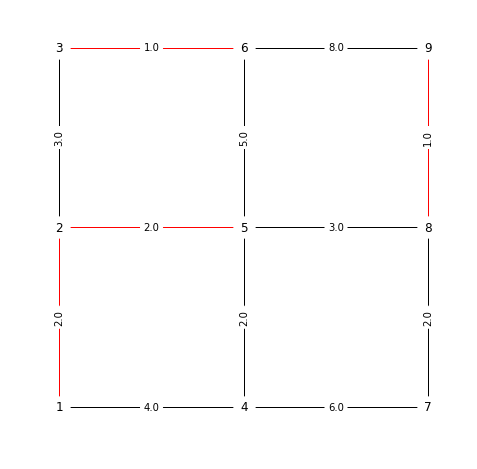

In [65]:
fig = plt.figure(figsize=(8,8))
G4 = nx.Graph()
list_edges = [(1,2,2.0) , (1,4,4.0) , (2,3,3.0) , (2,5,2.0) , (3,6,1.0) , (4,5,2.0) , (4,7,6.0) , (5,6,5.0) , (5,8,3.0) , (6,9,8.0) , (8,9,1.0) , (7,8,2.0)]
G4.add_weighted_edges_from(list_edges)
G4.node[1]['pos'] = (0,0)
G4.node[2]['pos'] = (0,2)
G4.node[3]['pos'] = (0,4)
G4.node[4]['pos'] = (2,0)
G4.node[5]['pos'] = (2,2)
G4.node[6]['pos'] = (2,4)
G4.node[7]['pos'] = (4,0)
G4.node[8]['pos'] = (4,2)
G4.node[9]['pos'] = (4,4)
T = nx.minimum_spanning_tree(G4)
print(T.edges())

node_pos=nx.get_node_attributes(G4,'pos')
edge_weight=nx.get_edge_attributes(G4,'weight')
red_edges = T.edges()
node_col = ['white']
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G4.edges()]
# Draw the nodes
nx.draw_networkx(G4, node_pos,node_color= node_col, node_size=450)
# Draw the node labels
# nx.draw_networkx_labels(G4, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G4, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw_networkx_edge_labels(G4, node_pos,edge_color= edge_col, edge_labels=edge_weight)
# Remove the axis
plt.axis('off')
# Show the plot
plt.show()
G4.clear()

## Play with modularity
http://ryancompton.net/2014/06/16/community-detection-and-colored-plotting-in-networkx/

You could you use similar code as shown in the shortest-path code.  To plot modularity or community structure.

Other references
  * http://perso.crans.org/aynaud/communities/api.html
  * http://networkx.readthedocs.io/en/latest/reference/algorithms.community.html